# download dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhi8923shriv/sentiment-analysis-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sentiment-analysis-dataset


In [2]:
! cp -r /kaggle/input/sentiment-analysis-dataset .

# imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


import re # for regex matching 
import nltk  # nltk library contains nlp modules
from nltk.corpus import stopwords # stopwords ['is' 'was' 'that']
from nltk.tokenize import word_tokenize # split the line into words
from nltk.stem import WordNetLemmatizer # lemmatization ['reading' -> 'read']
from sklearn.feature_extraction.text import TfidfVectorizer  # vectorizer count the frequency of the word occuring in the sentence


from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# essential downloads for nltk
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# import datasets

In [ ]:
df_train = pd.read_csv('train.csv', encoding='latin-1')
df_test = pd.read_csv('test.csv', encoding='latin-1')
df_train = df_train[['text', 'sentiment']]  # use only the review and sentiment
df_test = df_test[['text', 'sentiment']]
df_train.dropna(inplace=True) # remove the null values
df_test.dropna(inplace=True)
df_train.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [5]:
df_train['sentiment'].value_counts()

,count
sentiment,
neutral,11117
positive,8582
negative,7781


In [ ]:
# plot the sentiment distribution among the train df
plt.figure(figsize=(10,5))
sns.countplot(x='train_sentiment', data=df_train, hue='train_sentiment')
sns.countplot(x='test_sentiment', data=df_test, hue='test_sentiment')
plt.title("Sentiment distribution")
plt.show()

# preprocessing function

In [ ]:
def pre_process(text):
  # lower the text {Hi -> hi}
  text = text.lower()

  # removes the links {http://amazon.com}
  text = re.sub(r'http\S+', '', text)

  # remove any html tags {<br>}
  text = re.sub(r'[<?*>]', '', text)

  # split the words into tokens
  tokens = word_tokenize(text)

  # get the stop words from the nltk library
  stop_words = set(stopwords.words('english'))

  # remove the stop words from the tokens {is, no, yes, read} -> {yes, no, read}
  tokens = [token for token in tokens if token not in stop_words]

  # intialize the lemmatizer
  lemmatizer = WordNetLemmatizer()

  # lemmatize each words in the token { reading -> read }
  tokens = [lemmatizer.lemmatize(token) for token in tokens]

  # Join tokens back into text
  processed_text = ' '.join(tokens)

  return processed_text

In [ ]:
# example check
t = "hi i am a pal that is very easy to i he will be alright and im reading and working and studiiyning book"
print(pre_process(t))

hi pal easy alright im reading working studiiyning book


# train test split

In [ ]:
# map the sentiment into equivalent numbers for model's convinient
sentiment_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}

# convert the sentiment's type to str 
df_train['sentiment'] = df_train['sentiment'].str.lower()
df_test['sentiment'] = df_test['sentiment'].str.lower()

# replace the values according to the sentiment
df_train['sentiment'] = df_train['sentiment'].map(sentiment_mapping)
df_test['sentiment'] = df_test['sentiment'].map(sentiment_mapping)

In [ ]:
# shuffle the df 
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_test = df_test.sample(frac=1).reset_index(drop=True)

# apply the preprocssing function
df_train['text'].apply(pre_process)
df_test['text'].apply(pre_process)

,text
0,last session day
1,"` right , stare everyone else working thier la..."
2,nope way stop put wiv
3,`
4,anyone ticket mtv movie award guy scammed
...,...
3529,fiesta house mouth hit password
3530,` odd ` lap maybe ` cat : :
3531,"done disneyland , kid ` knocked , stopped hote..."
3532,` . ` ipod ` im


In [ ]:
# train test split 
x_train, x_text, y_train, y_test = df_train['text'], df_test['text'], df_train['sentiment'], df_test['sentiment']

# models


In [ ]:
"""
        Model construction

        Pipeline() -> ensure sequential processing
        vectorizer('tfidfVectorizer') -> count the frequency of the words and store it 
        Classifier('Naive bayers', 'SVM', 'Random Forest') -> using the vectorizer classify among the sentiments
        
"""



# naive model
naive_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# svm model
svc_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(kernel='linear'))
])

# random_forest
rf_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

NameError: name 'Pipeline' is not defined

In [ ]:
# fit the model with train_data
naive_model.fit(x_train, y_train)
svc_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [ ]:
# function for evaluating all the three models
def evaluate_model(model, x_test, y_test):
    # predict the x_test
    y_pred = model.predict(x_test)

    # calculate the accuracy_score
    accuracy = accuracy_score(y_test, y_pred)

    # build a confussion matrix for sns heatmap 
    confusion = confusion_matrix(y_test, y_pred)

    # generate a classification report
    classification_rep = classification_report(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion)
    print("Classification Report:\n", classification_rep)

    # plot the confusion matrix using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Accuracy: 0.7167515563101302
Confusion Matrix:
 [[ 661  313   27]
 [ 207 1087  136]
 [  47  271  785]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.66      0.69      1001
           1       0.65      0.76      0.70      1430
           2       0.83      0.71      0.77      1103

    accuracy                           0.72      3534
   macro avg       0.73      0.71      0.72      3534
weighted avg       0.73      0.72      0.72      3534



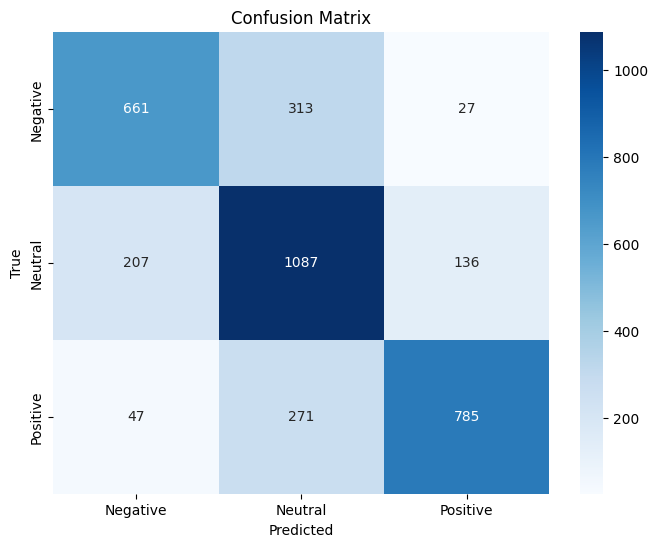

Accuracy: 0.6247877758913413
Confusion Matrix:
 [[ 371  606   24]
 [  83 1242  105]
 [  20  488  595]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.37      0.50      1001
           1       0.53      0.87      0.66      1430
           2       0.82      0.54      0.65      1103

    accuracy                           0.62      3534
   macro avg       0.71      0.59      0.60      3534
weighted avg       0.69      0.62      0.61      3534



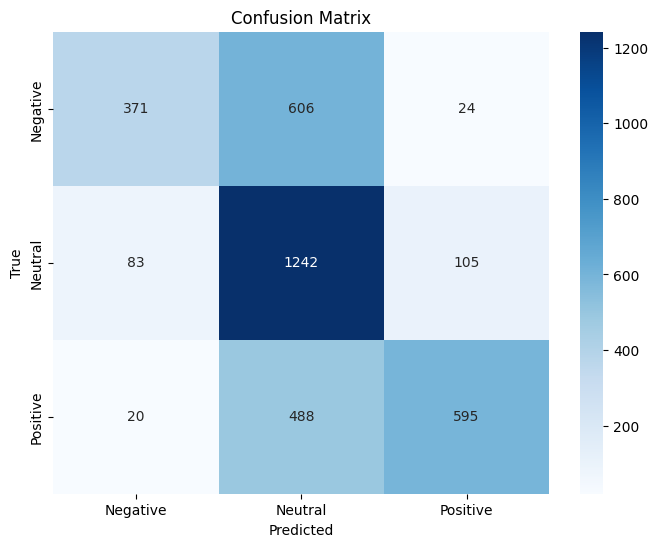

Accuracy: 0.6943972835314092
Confusion Matrix:
 [[ 558  404   39]
 [ 154 1140  136]
 [  34  313  756]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.56      0.64      1001
           1       0.61      0.80      0.69      1430
           2       0.81      0.69      0.74      1103

    accuracy                           0.69      3534
   macro avg       0.72      0.68      0.69      3534
weighted avg       0.71      0.69      0.69      3534



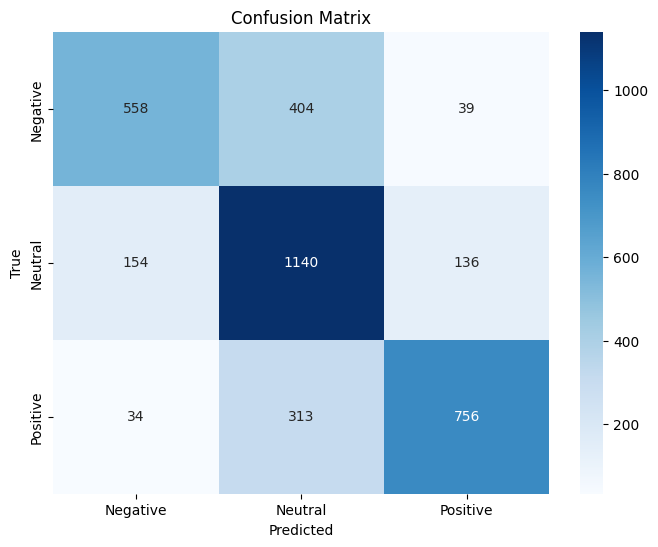

In [ ]:
# pass the modesl to the function
models = [svc_model, naive_model, rf_model]

for model in models:
  evaluate_model(model, x_text, y_test)